<a href="https://colab.research.google.com/github/koh-hongQ/Understanding_AI_with_Math/blob/main/0916GaussianProcess2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset generation

In [1]:
import numpy as np

X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

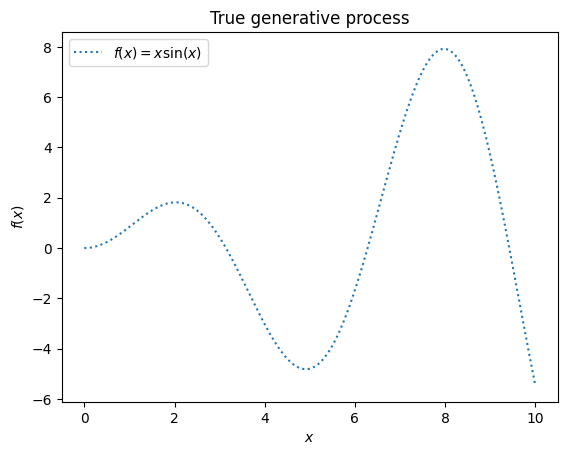

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

Example with noise-free target

In [3]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

5.02**2 * RBF(length_scale=1.43)

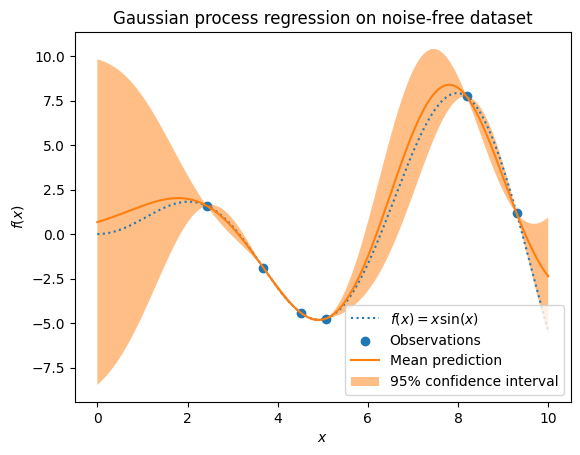

In [5]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

Example with noisy targets

In [7]:
noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

In [8]:
gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gaussian_process.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

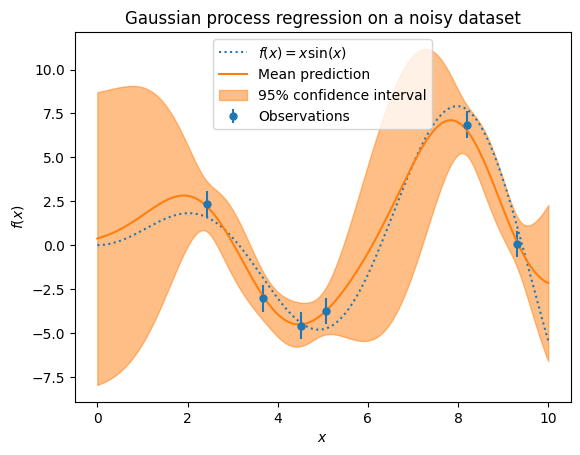

In [9]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


학습된 파라미터: RBF(length_scale=1.55) + WhiteKernel(noise_level=1e-05)
로그 주변우도(Log-marginal likelihood): -6.554698377514511


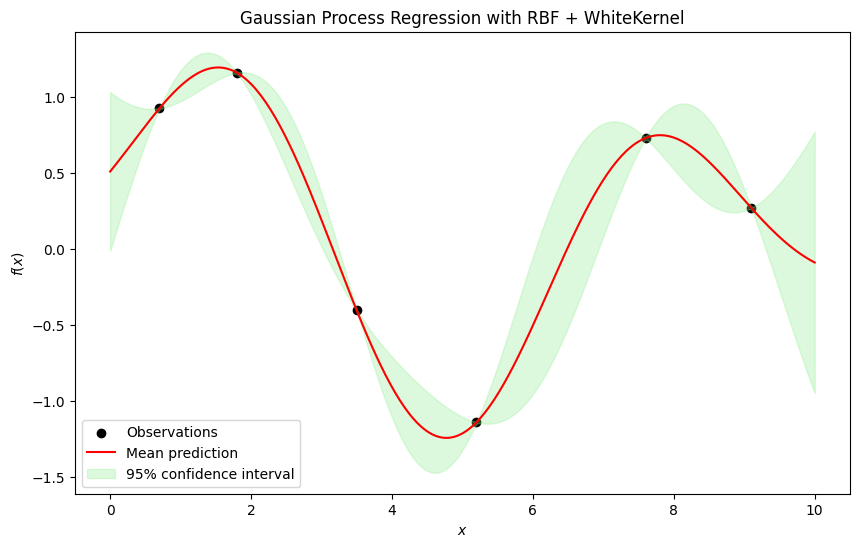

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel,DotProduct, Matern,RationalQuadratic

X = np.array([0.7, 1.8, 3.5, 5.2, 7.6, 9.1]).reshape(-1, 1)
y = np.array([0.9260, 1.1603, -0.4043, -1.1405, 0.7306, 0.2706])


# RBF + WhiteKernel

kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) \
         + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-5, 1e1))

kernel1 = Matern(length_scale=1.0, nu=1.5) + WhiteKernel(1.0, (1e-5, 1e1))
kernel2 =  RationalQuadratic(length_scale=1.0, alpha=1.0) + WhiteKernel(1.0, (1e-5, 1e1))
kernel3 = DotProduct(sigma_0=1.0) + WhiteKernel(1.0, (1e-5, 1e1))



# gaussian_process

gaussian_process = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=10,
    random_state=0
)
gaussian_process.fit(X, y)

#  예측

Xtest = np.linspace(0, 10, 300).reshape(-1, 1)
mean_prediction, std_prediction = gaussian_process.predict(Xtest, return_std=True)


#  결과 출력

print("학습된 파라미터:", gaussian_process.kernel_)
print("로그 주변우도(Log-marginal likelihood):", gaussian_process.log_marginal_likelihood())

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c="black", label="Observations")
plt.plot(Xtest, mean_prediction, "r", label="Mean prediction")
plt.fill_between(
    Xtest.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.3,
    color="lightgreen",
    label="95% confidence interval"
)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian Process Regression with RBF + WhiteKernel")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


학습된 파라미터: Matern(length_scale=1.63, nu=1.5) + WhiteKernel(noise_level=1e-05)
로그 주변우도(Log-marginal likelihood): -7.009997565844881


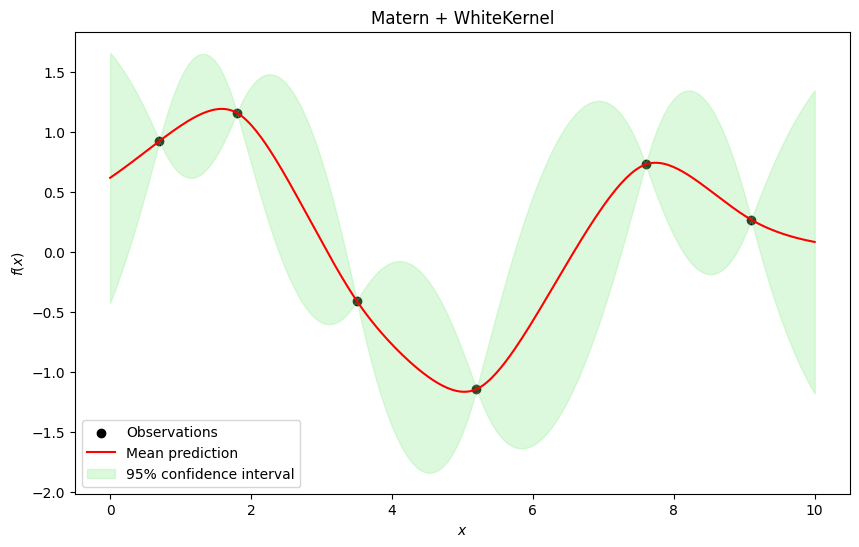

In [24]:
# gaussian_process

gaussian_process = GaussianProcessRegressor(
    kernel=kernel1,
    n_restarts_optimizer=10,
    random_state=0
)
gaussian_process.fit(X, y)

#  예측

Xtest = np.linspace(0, 10, 300).reshape(-1, 1)
mean_prediction, std_prediction = gaussian_process.predict(Xtest, return_std=True)


#  결과 출력

print("학습된 파라미터:", gaussian_process.kernel_)
print("로그 주변우도(Log-marginal likelihood):", gaussian_process.log_marginal_likelihood())

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c="black", label="Observations")
plt.plot(Xtest, mean_prediction, "r", label="Mean prediction")
plt.fill_between(
    Xtest.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.3,
    color="lightgreen",
    label="95% confidence interval"
)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Matern + WhiteKernel")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


학습된 파라미터: RationalQuadratic(alpha=1e+05, length_scale=1.55) + WhiteKernel(noise_level=1e-05)
로그 주변우도(Log-marginal likelihood): -6.554709819154959


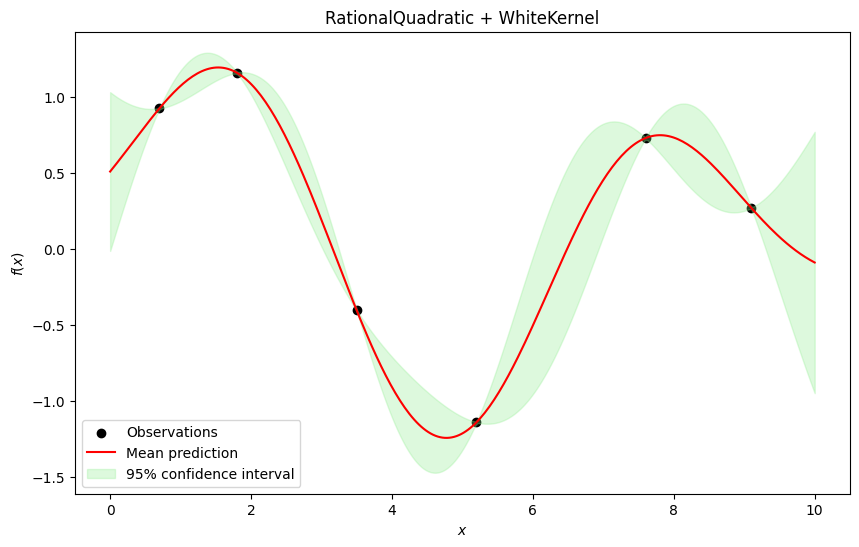

In [26]:
# gaussian_process

gaussian_process = GaussianProcessRegressor(
    kernel=kernel2,
    n_restarts_optimizer=10,
    random_state=0
)
gaussian_process.fit(X, y)

#  예측

Xtest = np.linspace(0, 10, 300).reshape(-1, 1)
mean_prediction, std_prediction = gaussian_process.predict(Xtest, return_std=True)


#  결과 출력

print("학습된 파라미터:", gaussian_process.kernel_)
print("로그 주변우도(Log-marginal likelihood):", gaussian_process.log_marginal_likelihood())

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c="black", label="Observations")
plt.plot(Xtest, mean_prediction, "r", label="Mean prediction")
plt.fill_between(
    Xtest.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.3,
    color="lightgreen",
    label="95% confidence interval"
)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("RationalQuadratic + WhiteKernel")
plt.legend()
plt.show()
